# Unsupervised Learning with KMeans Clustering

In [1]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# plt.style.use('ggplot') # style used
plt.style.use('ggplot')
# sns.set_palette('husl')

In [2]:
# import KMeans Clustering
from sklearn.cluster import KMeans

In [3]:
path = 'data/csv/wine.csv'

wine = pd.read_csv(path)

In [4]:
wine.head()

,class_label,class_name,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280,proline
0,1,Barolo,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,Barolo,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,Barolo,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,Barolo,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,Barolo,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [5]:
X = wine.drop(columns= 'class_name')
y = wine['class_name']

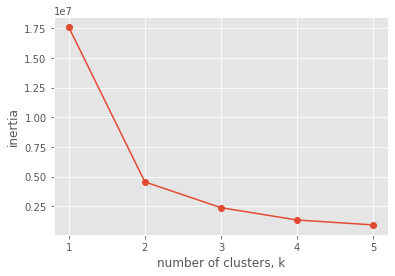

In [6]:
ks = range(1, 6)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters = k)
    
    # Fit model to samples
    model.fit(X)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()
# number of clusters = 3

In [7]:
model = KMeans(n_clusters = 3)

# Use fit_predict to fit model and obtain cluster labels: labels
labels = model.fit_predict(X)

# Create a DataFrame with labels and varieties as columns: df
df = pd.DataFrame({'labels': labels,'class_name': y})

# Create crosstab: ct
ct = pd.crosstab(df['labels'], df['class_name'])

# Display ct
print(ct)

class_name  Barbera  Barolo  Grignolino
labels                                 
0                29      13          20
1                 0      46           1
2                19       0          50


## Using Pipeline and Scaler

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [9]:
scaler = StandardScaler()
kmeans = KMeans(n_clusters=3)
pipeline = make_pipeline(scaler, kmeans)
pipeline.fit(X)
scaler_labels = pipeline.predict(X)

# Create a DataFrame with labels and varieties as columns: df
df = pd.DataFrame({'labels': scaler_labels,'class_name': y})

# Create crosstab: ct
ct = pd.crosstab(df['labels'], df['class_name'])

# Display ct
print(ct)

class_name  Barbera  Barolo  Grignolino
labels                                 
0                48       0           1
1                 0      59           2
2                 0       0          68


## KMeans Clustering Fish dataset

In [10]:
fish = pd.read_csv('data/csv/fish.csv', header=None)
fish.columns = ['Species', 1, 2, 3, 4, 5, 6]

In [11]:
fish.head()

,Species,1,2,3,4,5,6
0,Bream,242.0,23.2,25.4,30.0,38.4,13.4
1,Bream,290.0,24.0,26.3,31.2,40.0,13.8
2,Bream,340.0,23.9,26.5,31.1,39.8,15.1
3,Bream,363.0,26.3,29.0,33.5,38.0,13.3
4,Bream,430.0,26.5,29.0,34.0,36.6,15.1


In [12]:
samples = fish.drop(columns= 'Species')
species = fish['Species']

In [13]:
model = KMeans(n_clusters = 4)

# Use fit_predict to fit model and obtain cluster labels: labels
labels = model.fit_predict(samples)

# Create a DataFrame with labels and varieties as columns: df
df = pd.DataFrame({'labels': labels,'species': species})

# Create crosstab: ct
ct = pd.crosstab(df['labels'], df['species'])

# Display ct
print(ct)

species  Bream  Pike  Roach  Smelt
labels                            
0            1     1     17     14
1           16     2      0      0
2           17    10      3      0
3            0     4      0      0


In [14]:
# with scaler and pipeline
scaler = StandardScaler()
kmeans = KMeans(n_clusters=4)
pipeline = make_pipeline(scaler, kmeans)
pipeline.fit(samples)
labels = pipeline.predict(samples)

# Create a DataFrame with labels and varieties as columns: df
df = pd.DataFrame({'labels': labels,'species': species})

# Create crosstab: ct
ct = pd.crosstab(df['labels'], df['species'])

# Display ct
print(ct)

species  Bream  Pike  Roach  Smelt
labels                            
0           33     0      1      0
1            0     0      0     13
2            0    17      0      0
3            1     0     19      1


# Visualization with hierarchical clustering and t-SNE

In [15]:
# Hierarchical clustering
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

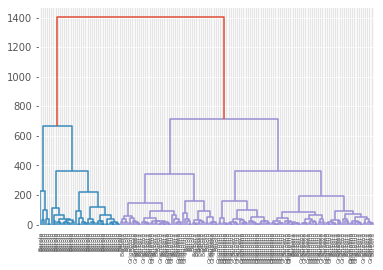

In [16]:
# wine datasets
mergings = linkage(X.values, method='complete')
dendrogram(mergings, labels=y.values, leaf_rotation=90, leaf_font_size=6)
plt.show()

### Fish dataset

In [17]:
mergings = linkage(samples.values, method='single')
labels = fcluster(mergings, 6, criterion='distance')
labels

array([49, 46, 26, 27, 15, 14, 17, 24, 14, 17, 18, 17, 17,  4,  4, 10, 10,
        5, 13,  7,  8,  6,  9, 10, 11, 11, 12, 57, 55, 51, 52, 51, 54, 53,
       31, 33, 34, 35, 38, 32, 39, 38, 41, 40, 42, 40, 42, 43, 42, 36, 44,
       47, 48, 25, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 29, 29,
       37, 45, 45, 45, 16, 28, 19, 20, 22, 21, 23, 50, 56, 58,  1,  2,  3],
      dtype=int32)

In [18]:
df = pd.DataFrame({'labels': labels,'species': species})
df.sort_values('labels')

,labels,species
82,1,Pike
83,2,Pike
84,3,Pike
14,4,Bream
13,4,Bream
...,...,...
32,54,Bream
28,55,Bream
80,56,Pike
27,57,Bream


# t-SNE for 2-dimensional maps


In [19]:
# Import library
from sklearn.manifold import TSNE

In [20]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [21]:
iris_samples = iris.drop(columns=['species']).values
iris_label = iris['species'].map({'setosa':0, 'versicolor':1, 'virginica':2}).values

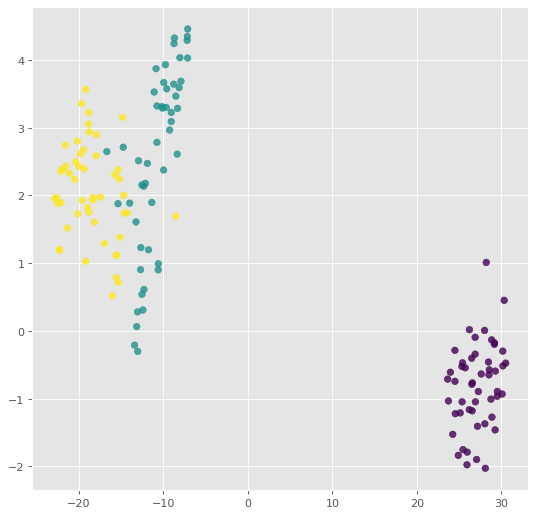

In [22]:
model = TSNE(learning_rate = 250)
transformed = model.fit_transform(iris_samples)
xs = transformed[:,0]
ys = transformed[:,1]
plt.figure(figsize=(8, 8), dpi=80)
plt.scatter(xs, ys, c=iris_label, alpha=0.8)

In [23]:
samples = samples.values
species = species.map({'Bream':0, 'Roach':1, 'Smelt':2, 'Pike':3}).values

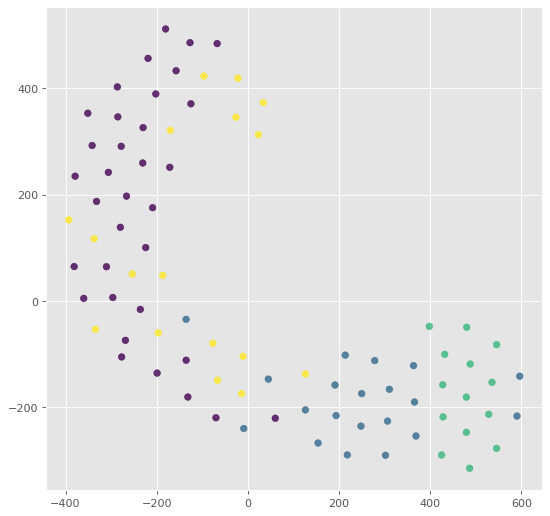

In [24]:
# fish dataset
model = TSNE(learning_rate = 1000)
transformed = model.fit_transform(samples)
xs = transformed[:,0]
ys = transformed[:,1]
plt.figure(figsize=(8, 8), dpi=80)
plt.scatter(xs, ys, c=species, alpha=0.8)

# Visualizing the PCA (Principal Component Analysis)

In [25]:
# import library
from sklearn.decomposition import PCA

In [26]:
iris_samples.shape

(150, 4)

In [27]:
# Dimension reduction iris dataset
pca = PCA(n_components = 2)
pca.fit(iris_samples)

transformed = pca.transform(iris_samples)
transformed.shape # reduce features from 4 to 2

(150, 2)

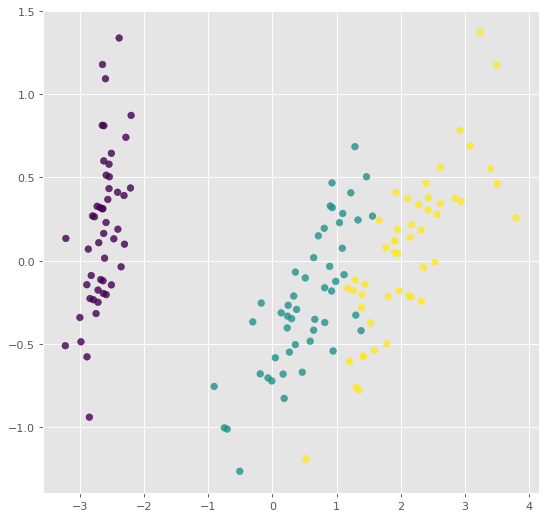

In [28]:
xs = transformed[:,0]
ys = transformed[:,1]

plt.figure(figsize=(8, 8), dpi=80)
plt.scatter(xs, ys, c=iris_label, alpha=0.8)

In [29]:
# fish dataset (samples, species)
pca = PCA(n_components = 2)
pca.fit(samples)

pca_scaled = pca.transform(samples)
pca_scaled.shape # reduce features from 4 to 2

(85, 2)

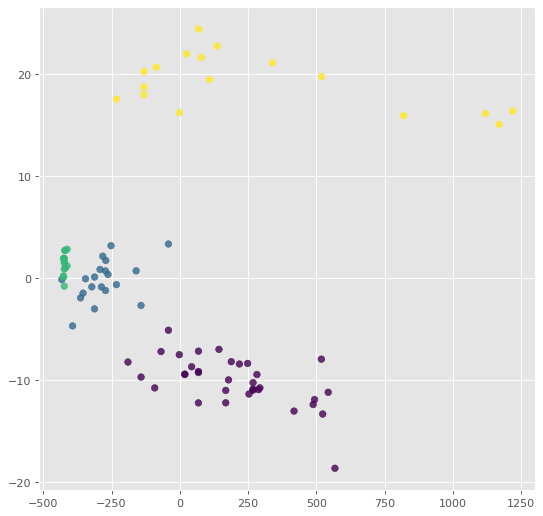

In [30]:
xs = pca_scaled[:,0]
ys = pca_scaled[:,1]

plt.figure(figsize=(8, 8), dpi=80)
plt.scatter(xs, ys, c=species, alpha=0.8)

# Dimension Reduction using NMF

In [31]:
# import library
from sklearn.decomposition import NMF
from sklearn.preprocessing import normalize

In [32]:
wiki = pd.read_csv('data/csv/wikipedia-vectors.csv')
wiki.set_index('Unnamed: 0', inplace=True)
wiki.head()

,HTTP 404,Alexa Internet,Internet Explorer,HTTP cookie,Google Search,Tumblr,Hypertext Transfer Protocol,Social search,Firefox,LinkedIn,...,Chad Kroeger,Nate Ruess,The Wanted,Stevie Nicks,Arctic Monkeys,Black Sabbath,Skrillex,Red Hot Chili Peppers,Sepsis,Adam Levine
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.008878,0.0,0.0,0.049502,0.000000,0.00000,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.00611,0.0
2,0.0,0.029607,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.00000,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.005646,0.00000,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.00000,0.0


In [33]:
article_name = list(wiki.columns)
type(article_name)

list

In [34]:
articles = wiki.values
articles.shape

(13125, 60)

In [35]:
model = NMF(n_components = 6)
model.fit(articles.T)
nmf_articles = model.transform(articles.T)

In [36]:
norm_articles = normalize(nmf_articles)

In [37]:
article_name

['HTTP 404',
 'Alexa Internet',
 'Internet Explorer',
 'HTTP cookie',
 'Google Search',
 'Tumblr',
 'Hypertext Transfer Protocol',
 'Social search',
 'Firefox',
 'LinkedIn',
 'Global warming',
 'Nationally Appropriate Mitigation Action',
 'Nigel Lawson',
 'Connie Hedegaard',
 'Climate change',
 'Kyoto Protocol',
 '350.org',
 'Greenhouse gas emissions by the United States',
 '2010 United Nations Climate Change Conference',
 '2007 United Nations Climate Change Conference',
 'Angelina Jolie',
 'Michael Fassbender',
 'Denzel Washington',
 'Catherine Zeta-Jones',
 'Jessica Biel',
 'Russell Crowe',
 'Mila Kunis',
 'Dakota Fanning',
 'Anne Hathaway',
 'Jennifer Aniston',
 'France national football team',
 'Cristiano Ronaldo',
 'Arsenal F.C.',
 'Radamel Falcao',
 'Zlatan Ibrahimović',
 'Colombia national football team',
 '2014 FIFA World Cup qualification',
 'Football',
 'Neymar',
 'Franck Ribéry',
 'Tonsillitis',
 'Hepatitis B',
 'Doxycycline',
 'Leukemia',
 'Gout',
 'Hepatitis C',
 'Predniso

In [38]:
df = pd.DataFrame(norm_articles, index=article_name)


In [39]:
# simmilar to Cristiano Ronaldo
article = df.loc['Cristiano Ronaldo']
df.dot(article).nlargest()

Cristiano Ronaldo                1.000000
Franck Ribéry                    0.999972
Radamel Falcao                   0.999942
Zlatan Ibrahimović               0.999942
France national football team    0.999923
dtype: float64

In [40]:
# simmilar to 2014 FIFA World Cup qualification
article = df.loc['2014 FIFA World Cup qualification']
df.dot(article).nlargest()

2014 FIFA World Cup qualification    1.000000
France national football team        0.998688
Colombia national football team      0.998487
Cristiano Ronaldo                    0.998443
Radamel Falcao                       0.998368
dtype: float64